# Mundo 24

### Análise de dados

In [1]:
import pandas as pd
import yfinance as yf

/home/vinicius/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
inicio = "2017-01-01"
final = "2022-08-31"

dados_weg = yf.download("WEGE3.SA", inicio, final)['Adj Close']

dados_weg

[*********************100%***********************]  1 of 1 completed


Date
2017-01-02     5.311528
2017-01-03     5.578864
2017-01-04     5.445197
2017-01-05     5.431126
2017-01-06     5.476854
                ...    
2022-08-24    28.706726
2022-08-25    28.866264
2022-08-26    28.726665
2022-08-29    28.287941
2022-08-30    28.307882
Name: Adj Close, Length: 1410, dtype: float64

In [3]:
#retorno diário 

dados_weg.pct_change()

Date
2017-01-02         NaN
2017-01-03    0.050331
2017-01-04   -0.023960
2017-01-05   -0.002584
2017-01-06    0.008420
                ...   
2022-08-24   -0.000347
2022-08-25    0.005558
2022-08-26   -0.004836
2022-08-29   -0.015272
2022-08-30    0.000705
Name: Adj Close, Length: 1410, dtype: float64

In [4]:
#retorno_anual

dados_weg.resample("Y").last().pct_change().dropna()

Date
2018-12-31   -0.037392
2019-12-31    1.007021
2020-12-31    1.202823
2021-12-31   -0.119122
2022-12-31   -0.126355
Freq: A-DEC, Name: Adj Close, dtype: float64

In [5]:
#janela de retorno de 36 meses

dias = 252 

dados_36m = dados_weg.pct_change(periods = dias).dropna()

dados_36m

Date
2017-12-28    0.627257
2017-12-29    0.549280
2018-01-02    0.647222
2018-01-03    0.626407
2018-01-04    0.597118
                ...   
2022-08-24   -0.186763
2022-08-25   -0.176982
2022-08-26   -0.178895
2022-08-29   -0.207438
2022-08-30   -0.215291
Name: Adj Close, Length: 1158, dtype: float64

<AxesSubplot: xlabel='Date'>

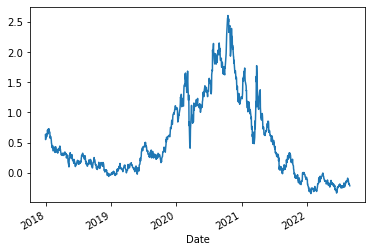

In [6]:
dados_36m.plot()

In [7]:
dados_mercado = yf.download(["^BVSP", "WEGE3.SA"], inicio, final)['Adj Close']
dados_mercado

[*********************100%***********************]  2 of 2 completed


,WEGE3.SA,^BVSP
Date,,
2017-01-02,5.311528,59589.0
2017-01-03,5.578864,61814.0
2017-01-04,5.445197,61589.0
2017-01-05,5.431126,62071.0
2017-01-06,5.476854,61665.0
...,...,...
2022-08-24,28.706726,112898.0
2022-08-25,28.866264,113532.0
2022-08-26,28.726665,112299.0


In [8]:
dados_36m = dados_mercado.pct_change(periods = dias).dropna()

dados_36m

,WEGE3.SA,^BVSP
Date,,
2017-12-28,0.627257,0.282149
2017-12-29,0.549280,0.235998
2018-01-02,0.647222,0.264690
2018-01-03,0.626407,0.256545
2018-01-04,0.597118,0.275391
...,...,...
2022-08-24,-0.186763,-0.043667
2022-08-25,-0.176982,-0.033540
2022-08-26,-0.178895,-0.065818


<AxesSubplot: xlabel='Date'>

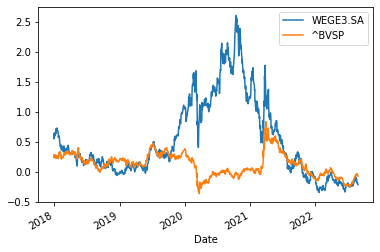

In [9]:
dados_36m.plot()

# Exercícios

* Exercício 79: Puxe as cotações de uma empresa a sua escolha e calcule o retorno diário e o retorno anual.
* Exercício 80: Compare as janelas de 12 meses de retorno de uma empresa escolhida pelo usuário com as janelas de 12 meses de retorno do ibovespa. 

In [10]:
#Gabrito 79

dados_acao = yf.download("LREN3.SA", inicio, final)['Adj Close']

retornos_diarios = dados_acao.pct_change().dropna()
retornos_anuais = dados_acao.resample("Y").last().pct_change().dropna()

retornos_anuais

[*********************100%***********************]  1 of 1 completed


Date
2018-12-31    0.209546
2019-12-31    0.484967
2020-12-31   -0.211190
2021-12-31   -0.425802
2022-12-31    0.135424
Freq: A-DEC, Name: Adj Close, dtype: float64

[*********************100%***********************]  2 of 2 completed


<AxesSubplot: xlabel='Date'>

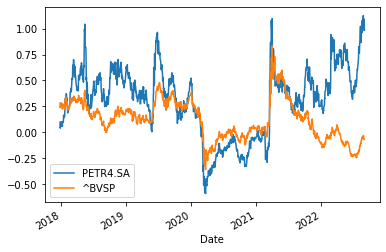

In [11]:
#gabarito 80 

empresa = input("Qual empresa você quer analisar: ")

empresa = empresa + ".SA"

dados_mercado = yf.download(["^BVSP", empresa], inicio, final)['Adj Close']

retornos_12m = dados_mercado.pct_change(periods = 252).dropna()
retornos_12m.plot()

# Mundo 25

Agora que você já calculou os retornos, como você pode calcular médias móveis no Pandas?